**Import the data and packages that would be most helpful, such as pandas, numpy and matplotlib**

In [11]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load dataset into dataframe
df = pd.read_csv('Yellow_Taxi_Trip_Data.csv')

**Data exploration and cleaning**

In [13]:
df.head()  # Display the first few rows of the dataframe

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,3/25/2025 8:55,3/25/2017 9:09,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,4/11/2025 14:53,4/11/2017 15:19,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2025 7:26,12/15/2017 7:34,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,5/7/2025 13:17,5/7/2017 13:48,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,4/15/2025 23:32,4/15/2017 23:49,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [14]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There is no missing data according to the results from the info() function.

In [16]:
df.size

408582

In [17]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

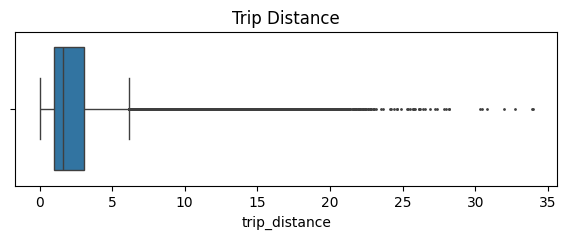

In [18]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('Trip Distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

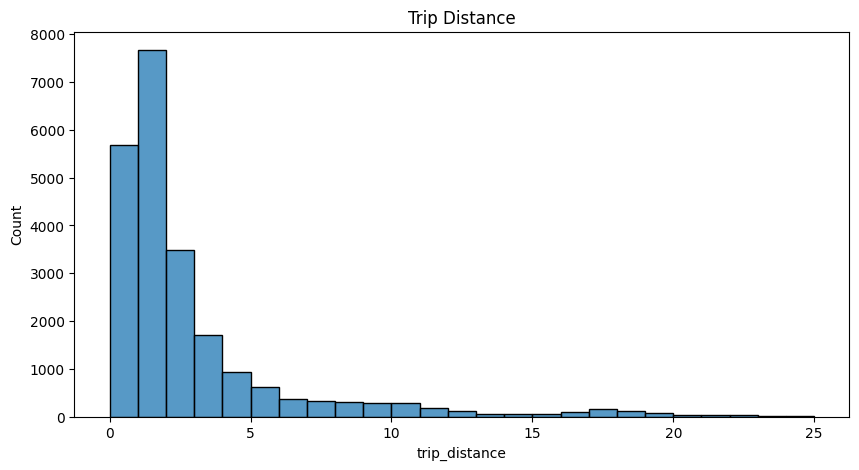

In [19]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip Distance');

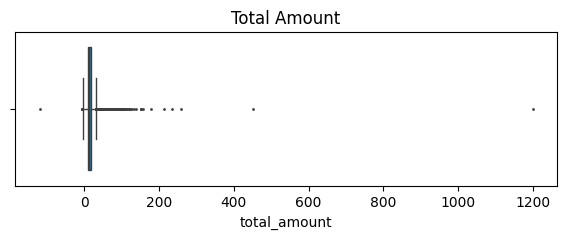

In [20]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('Total Amount')
sns.boxplot(data=None, x=df['total_amount'], fliersize=1);

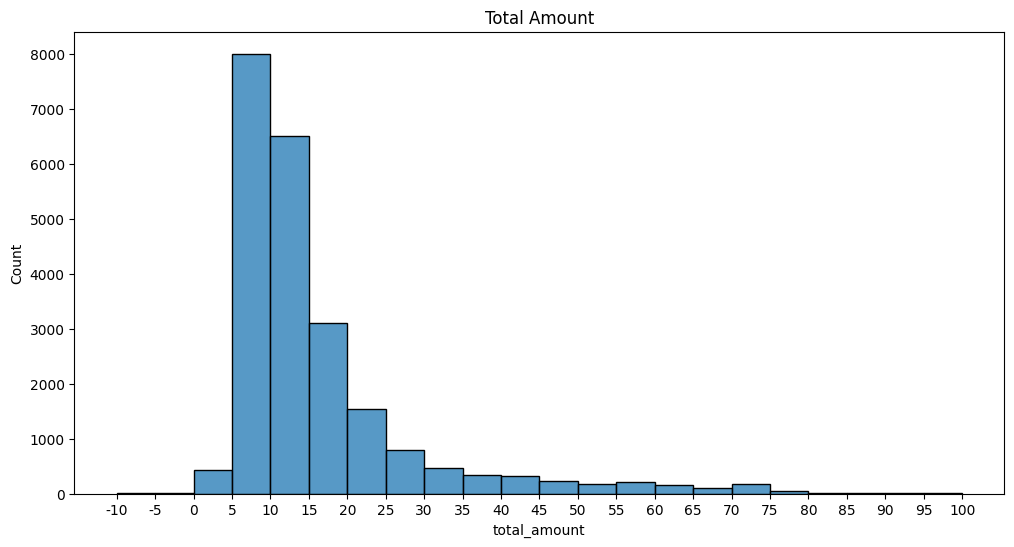

In [21]:
# Create histogram of total_amount
plt.figure(figsize = (12, 6))
ax = sns.histplot(df['total_amount'], bins=range(-10, 101, 5))
ax.set_xticks(range(-10, 101, 5))
ax.set_xticklabels(range(-10, 101, 5))
plt.title('Total Amount');

Text(0.5, 1.0, 'Tip Amount')

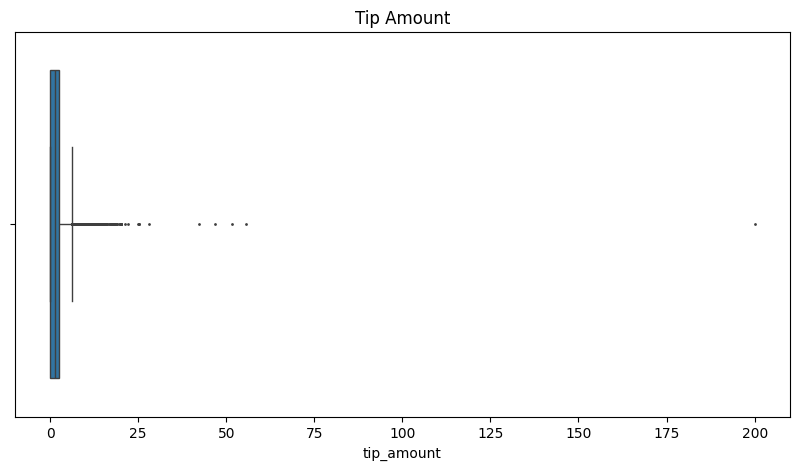

In [22]:
# Create box plot of tip_amount
plt.figure(figsize=(10,5))
sns.boxplot(x=df['tip_amount'], fliersize=1)
plt.title('Tip Amount')

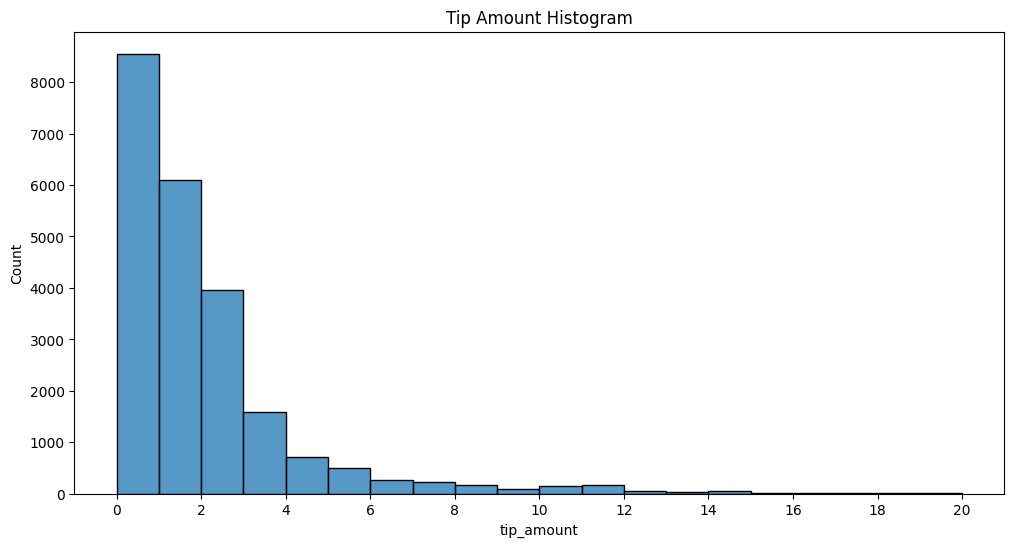

In [23]:
# Create histogram of tip_amount
plt.figure(figsize=(12, 6))
am = sns.histplot(df['tip_amount'], bins = range(0, 21, 1))
am.set_xticks(range(0, 21, 2))
am.set_xticklabels(range(0, 21, 2))
plt.title('Tip Amount Histogram');

Text(0.5, 1.0, 'Tip Amount by vendor histmap')

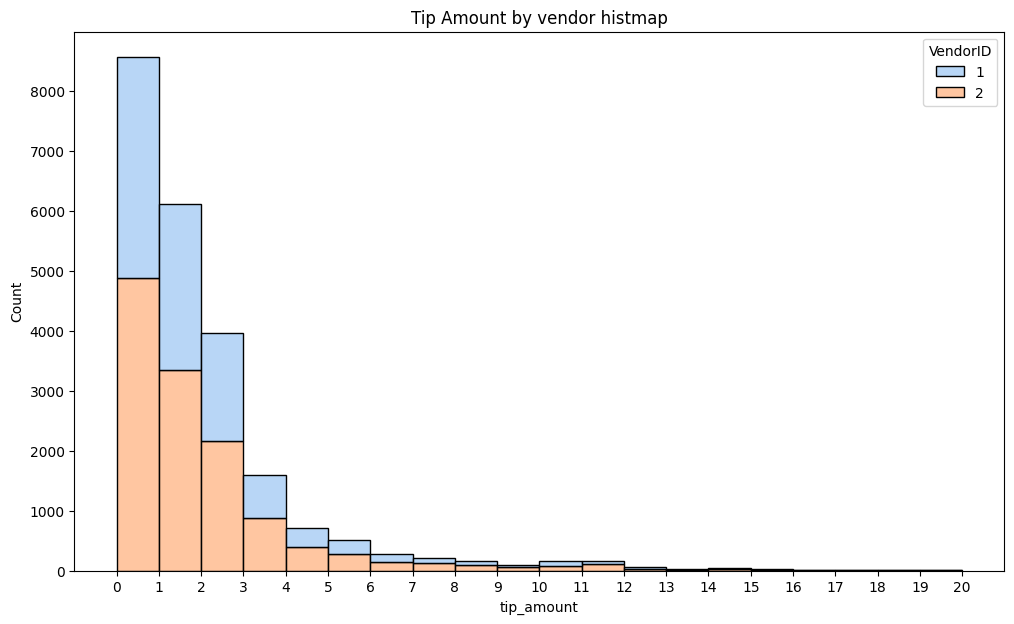

In [24]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x = 'tip_amount', bins = range(0, 21, 1),
                 hue = 'VendorID',
                 multiple = 'stack',
                  palette = 'pastel'
                 )

ax.set_xticks(range(0, 21, 1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip Amount by vendor histmap')

Text(0.5, 1.0, 'Tip Amount by Vendor Histogram')

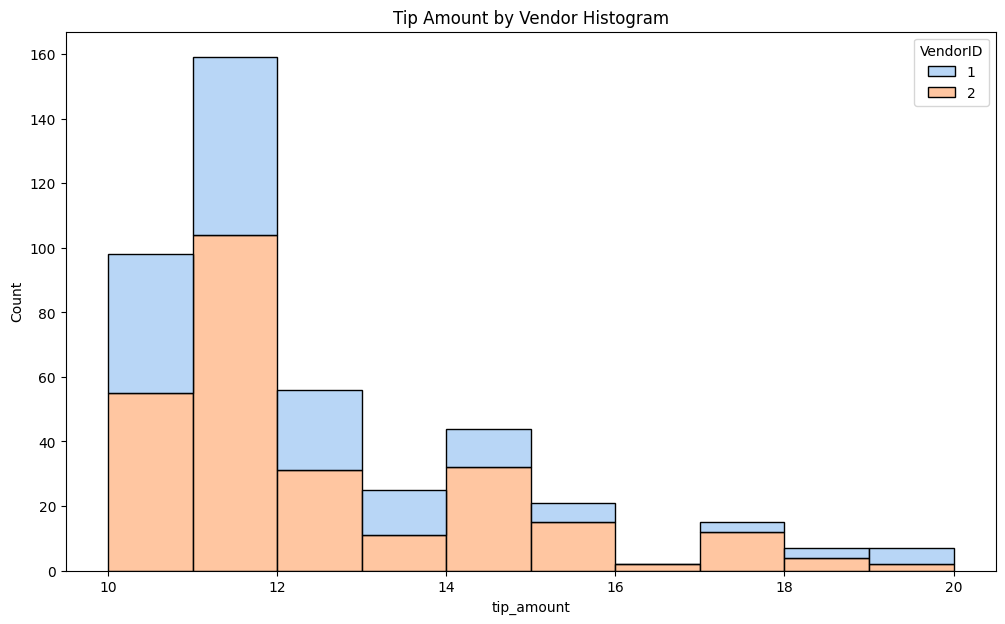

In [25]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12, 7))
ax = sns.histplot(data=tips_over_ten, x = 'tip_amount', bins = range(10, 21,1),
                 hue = 'VendorID',
                  multiple = 'stack',
                  palette = 'pastel'
                 )

plt.title('Tip Amount by Vendor Histogram')

**Mean tips by passenger count**

Examine the unique values in the passenger_count column.

In [26]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [27]:
# Calculate mean tips by passenger_count
mean_tip_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean()
mean_tip_by_passenger_count = mean_tip_by_passenger_count.reset_index()
mean_tip_by_passenger_count


,passenger_count,tip_amount
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


C:\Users\Rashidul_Islam\AppData\Local\Temp\ipykernel_10604\3027321159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
C:\Users\Rashidul_Islam\AppData\Local\Temp\ipykernel_10604\3027321159.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


Text(0.5, 1.0, 'Mean Tip Amount By Passenger Count')

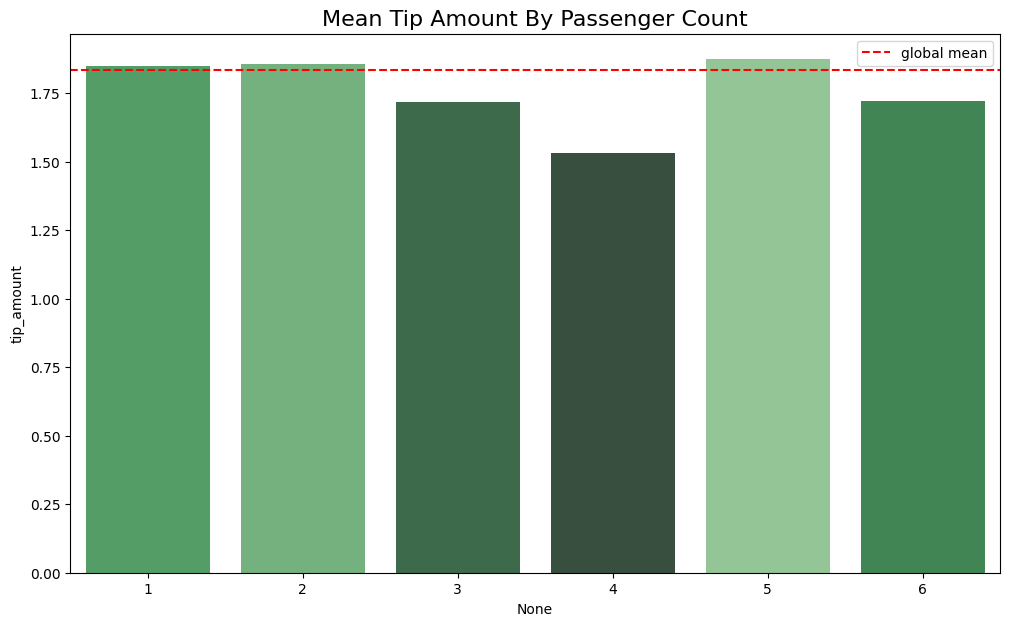

In [28]:
# Create bar plot for mean tips by passenger count
data = mean_tip_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=data.index,
                 y=data['tip_amount'],
                 palette = np.array(pal[::-1])[rank]
                )
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label = 'global mean')
ax.legend()
plt.title('Mean Tip Amount By Passenger Count', fontsize = '16')

**Create month and day columns**

In [29]:
# Create a month and day column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

In [30]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

Reorder the results to put the months in calendar order.

In [31]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

C:\Users\Rashidul_Islam\AppData\Local\Temp\ipykernel_10604\3313101063.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


Text(0.5, 1.0, 'BarPlot By Total Rides Per Month')

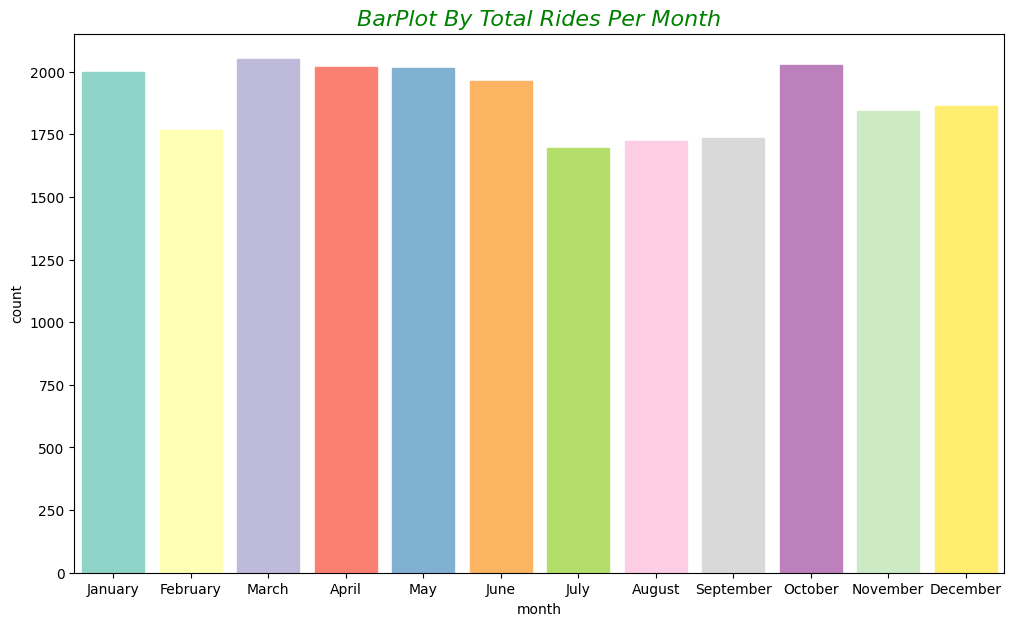

In [32]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=monthly_rides.index, y = monthly_rides)
ax.set_xticklabels(month_order)
#change bar multi color
for i, bar in enumerate(ax.patches):
    bar.set_color(sns.color_palette("Set3", len(month_order))[i % len(month_order)])
plt.title('BarPlot By Total Rides Per Month', fontsize = '16', color = "Green", style = 'oblique')

In [33]:
# Repeat the above process, this time for rides by day
day_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_rides = day_rides.reindex(index=day_order)
day_rides

day
Monday       3413
Tuesday      3367
Wednesday    2998
Thursday     2931
Friday       3198
Saturday     3390
Sunday       3402
Name: count, dtype: int64

C:\Users\Rashidul_Islam\AppData\Local\Temp\ipykernel_10604\223864796.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


Text(0.5, 1.0, 'BarPlot By Day Rides')

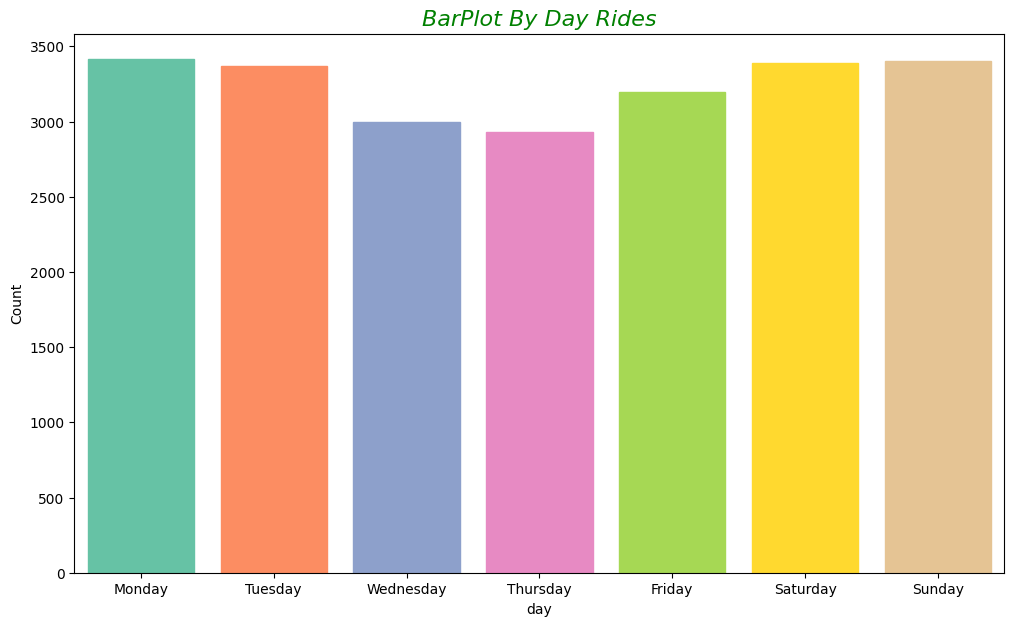

In [34]:
# Create bar plot for ride count by day
plt.figure(figsize = (12, 7))
ax = sns.barplot(x=day_rides.index, y = day_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
for i, bar in enumerate(ax.patches):
    bar.set_color(sns.color_palette("Set2", len(day_order))[i % len(day_order)])
plt.title('BarPlot By Day Rides', fontsize = '16', color = 'Green', style = 'italic')

In [35]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,55818.74
Tuesday,51195.40
Wednesday,48624.06
Thursday,49574.37
Friday,52527.14
Saturday,55310.47
Sunday,57181.91


C:\Users\Rashidul_Islam\AppData\Local\Temp\ipykernel_10604\2751532684.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


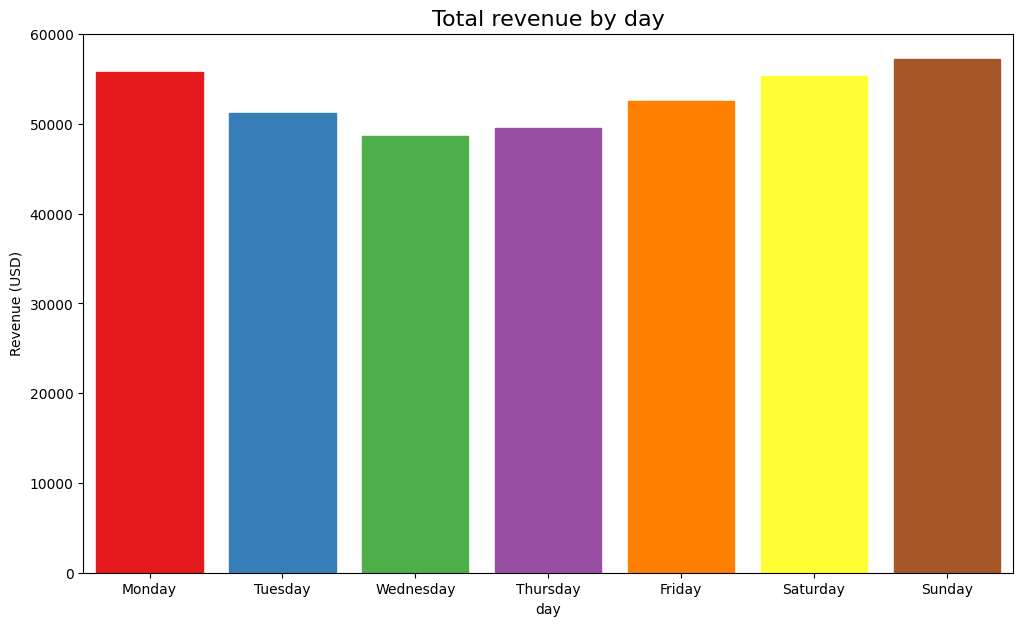

In [36]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
for i, bar in enumerate(ax.patches):
    bar.set_color(sns.color_palette("Set1", len(day_order))[i % len(day_order)])
plt.title('Total revenue by day', fontsize=16);

In [40]:
total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 1.0, 'Total revenue by month')

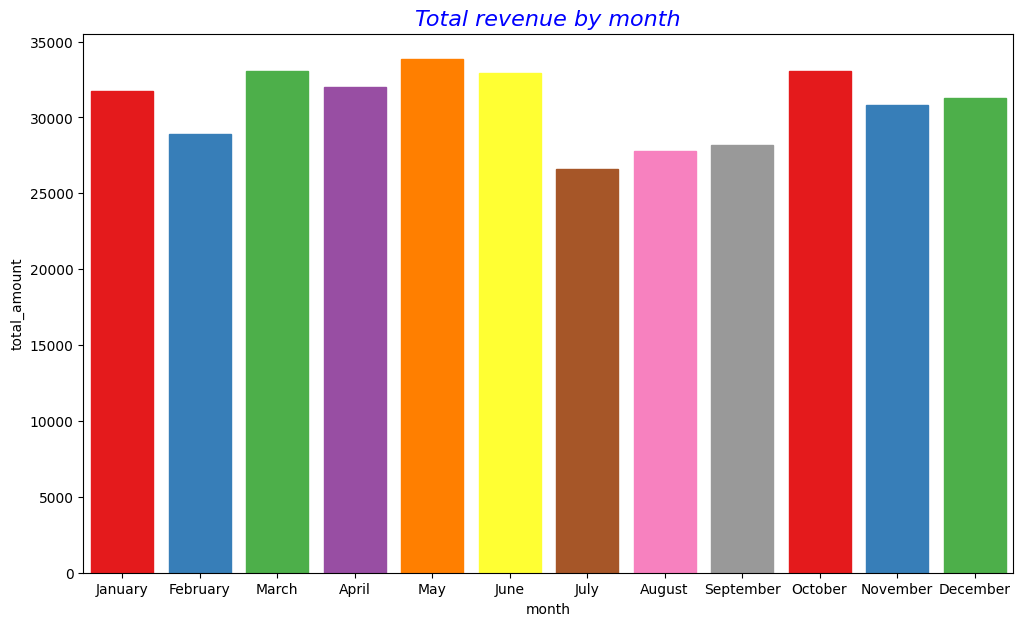

In [44]:
# Total revenue by month
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
# ax.set_xticklabels(month_order)
for i, bar in enumerate(ax.patches):
    bar.set_color(sns.color_palette("Set1", len(month_order))[i % len(month_order)])

plt.title('Total revenue by month', fontsize=16, color='blue', style='italic')

In [46]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [51]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance']].mean()

# Sort the results in descending order by mean trip distance
#==> ENTER YOUR CODE HERE
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff


,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 1.0, 'Mean Trip Distance by Drop-off Location')

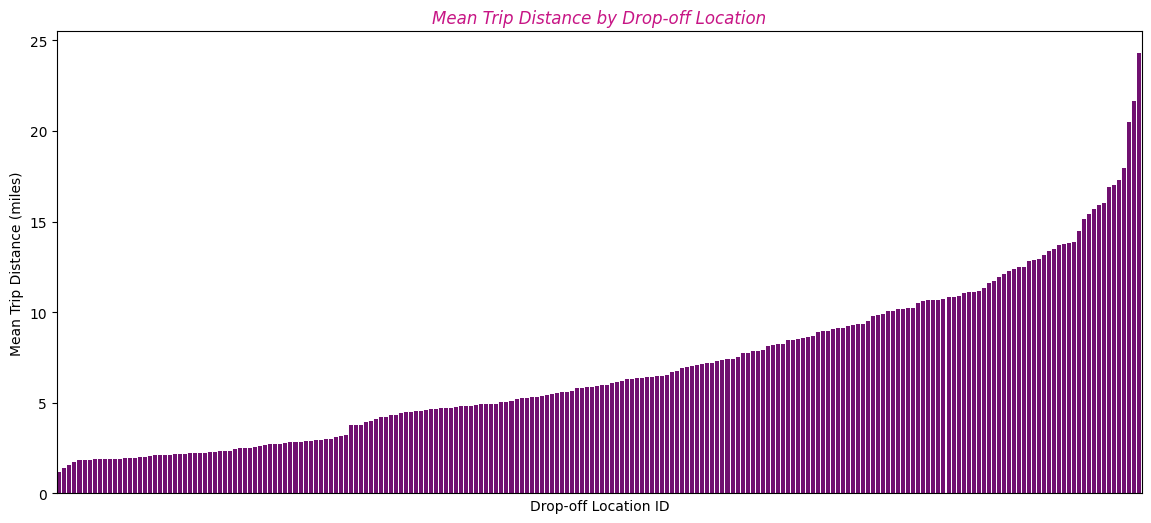

In [76]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=distance_by_dropoff.index,
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index,
                 color='Purple'
                 )
ax.set_xticklabels([])
ax.set_xticks([])
plt.xlabel('Drop-off Location ID')
plt.ylabel('Mean Trip Distance (miles)')
plt.title('Mean Trip Distance by Drop-off Location', fontsize=12, style='italic', color='MediumVioletRed')